# **Logistic Regression**

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

    - Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
    - Triaxial Angular velocity from the gyroscope.
    - A 561-feature vector with time and frequency domain variables.
    - Its activity label

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_palette('dark')


**we will get error if we simply write sep=',' so used two methods one is sep='delimiter' and the other is on_bad_lines='skip'**

In [ ]:
pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv",sep='delimiter')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


"tBodyAcc-mean()-X","tBodyAcc-mean()-Y","tBodyAcc-mean()-Z","tBodyAcc-std()-X","tBodyAcc-std()-Y","tBodyAcc-std()-Z","tBodyAcc-mad()-X","tBodyAcc-mad()-Y","tBodyAcc-mad()-Z","tBodyAcc-max()-X","tBodyAcc-max()-Y","tBodyAcc-max()-Z","tBodyAcc-min()-X","tBodyAcc-min()-Y","tBodyAcc-min()-Z","tBodyAcc-sma()","tBodyAcc-energy()-X","tBodyAcc-energy()-Y","tBodyAcc-energy()-Z","tBodyAcc-iqr()-X","tBodyAcc-iqr()-Y","tBodyAcc-iqr()-Z","tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z","tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z","tGravityAcc-mean()-X","tGravityAcc-mean()-Y","tGravityAcc-mean()-Z","tGravityAcc-std()-X","tGravityAcc-std()-Y","tGravityAcc-std()-Z","tGravityAcc-mad()-X","tGravityAcc-mad()-Y","tGravityAcc-mad()-Z","tGravityAcc-max()-X","tGravityAcc-max()-Y","tGravityAcc-max()-Z","tGravityAcc-min()-X","tGravityAcc-min()-Y","tGravityAcc-min()-Z","tGravityAcc-sma()","tGravityAcc-energy()-X","tGravityAcc-energy()-Y","tGravityAcc-energy()-Z","tGravityAcc-iqr()-X","tGravityAcc-iqr()-Y","tGravityAcc-iqr()-Z","tGravityAcc-entropy()-X","tGravityAcc-entropy()-Y","tGravityAcc-entropy()-Z","tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z","tBodyAccJerk-mean()-X","tBodyAccJerk-mean()-Y","tBodyAccJerk-mean()-Z","tBodyAccJerk-std()-X","tBodyAccJerk-std()-Y","tBodyAccJerk-std()-Z","tBodyAccJerk-mad()-X","tBodyAccJerk-mad()-Y","tBodyAccJerk-mad()-Z","tBodyAccJerk-max()-X","tBodyAccJerk-max()-Y","tBodyAccJerk-max()-Z","tBodyAccJerk-min()-X","tBodyAccJerk-min()-Y","tBodyAccJerk-min()-Z","tBodyAccJerk-sma()","tBodyAccJerk-energy()-X","tBodyAccJerk-energy()-Y","tBodyAccJerk-energy()-Z","tBodyAccJerk-iqr()-X","tBodyAccJerk-iqr()-Y","tBodyAccJerk-iqr()-Z","tBodyAccJerk-entropy()-X","tBodyAccJerk-entropy()-Y","tBodyAccJerk-entropy()-Z","tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z","tBodyGyro-mean()-X","tBodyGyro-mean()-Y","tBodyGyro-mean()-Z","tBodyGyro-std()-X","tBodyGyro-std()-Y","tBodyGyro-std()-Z","tBodyGyro-mad()-X","tBodyGyro-mad()-Y","tBodyGyro-mad()-Z","tBodyGyro-max()-X","tBodyGyro-max()-Y","tBodyGyro-max()-Z","tBodyGyro-min()-X","tBodyGyro-min()-Y","tBodyGyro-min()-Z","tBodyGyro-sma()","tBodyGyro-energy()-X","tBodyGyro-energy()-Y","tBodyGyro-energy()-Z","tBodyGyro-iqr()-X","tBodyGyro-iqr()-Y","tBodyGyro-iqr()-Z","tBodyGyro-entropy()-X","tBodyGyro-entropy()-Y","tBodyGyro-entropy()-Z","tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z","tBodyGyroJerk-mean()-X","tBodyGyroJerk-mean()-Y","tBodyGyroJerk-mean()-Z","tBodyGyroJerk-std()-X","tBodyGyroJerk-std()-Y","tBodyGyroJerk-std()-

In [ ]:
data=pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv",sep='delimiter')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
data.dtypes

"tBodyAcc-mean()-X","tBodyAcc-mean()-Y","tBodyAcc-mean()-Z","tBodyAcc-std()-X","tBodyAcc-std()-Y","tBodyAcc-std()-Z","tBodyAcc-mad()-X","tBodyAcc-mad()-Y","tBodyAcc-mad()-Z","tBodyAcc-max()-X","tBodyAcc-max()-Y","tBodyAcc-max()-Z","tBodyAcc-min()-X","tBodyAcc-min()-Y","tBodyAcc-min()-Z","tBodyAcc-sma()","tBodyAcc-energy()-X","tBodyAcc-energy()-Y","tBodyAcc-energy()-Z","tBodyAcc-iqr()-X","tBodyAcc-iqr()-Y","tBodyAcc-iqr()-Z","tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z","tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z","tGravityAcc-mean()-X","tGravityAcc-mean()-Y","tGravityAcc-mean()-Z","tGravityAcc-std()-X","tGravityAcc-std()-Y","tG

In [ ]:
data.dtypes.value_counts()

object    1
dtype: int64

In [ ]:
pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (548) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.99045792,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.99454373,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274

In [ ]:
data=pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (548) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [ ]:
data.dtypes.value_counts()

float64    560
object       2
dtype: int64

**it shows 2 objects but there is only one object column which shows like walking, walking upstairs, walking downstairs, sitting, standing, and laying**
❓

**I think there has been problem in downloading the csv file so now it has been reseted**

In [2]:
pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv',sep=',')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.

In [3]:
data=pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv',sep=',')

In [4]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

**we know to see first 5 values we use data.head() what if we want to see last 5 values**

In [6]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

And we can see that here as we look at the data.dtypes and look at the last five values and we see that activity is going to be that one object, column.

**We're then going to see that the data is scaled from a minimum of negative one to a maximum of one. So there's some type of scaling here and the way that we're going to prove it is that for every single value, we're going to see that all of the minimums are negative one and all of the maximums are positive one.**

In [7]:
data.iloc[:,:-1].min()

tBodyAcc-mean()-X                      -1.0
tBodyAcc-mean()-Y                      -1.0
tBodyAcc-mean()-Z                      -1.0
tBodyAcc-std()-X                       -1.0
tBodyAcc-std()-Y                       -1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)       -1.0
angle(tBodyGyroJerkMean,gravityMean)   -1.0
angle(X,gravityMean)                   -1.0
angle(Y,gravityMean)                   -1.0
angle(Z,gravityMean)                   -1.0
Length: 561, dtype: float64

In [8]:
data.iloc[:,:-1].min().value_counts()

-1.0    561
dtype: int64

In [9]:
data.iloc[:,:-1].max()

tBodyAcc-mean()-X                       1.0
tBodyAcc-mean()-Y                       1.0
tBodyAcc-mean()-Z                       1.0
tBodyAcc-std()-X                        1.0
tBodyAcc-std()-Y                        1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)        1.0
angle(tBodyGyroJerkMean,gravityMean)    1.0
angle(X,gravityMean)                    1.0
angle(Y,gravityMean)                    1.0
angle(Z,gravityMean)                    1.0
Length: 561, dtype: float64

In [10]:
data.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

**Next thing we want to do is look at the breakdown of each one of the activities. And we see here that our outcome variable has a fairly balanced set. So we see that they each take up an equal proportion of the overall rows**

That different types of error metrics are going to work better for different types of datasets, whether they're balanced or unbalanced. So here we're working with a balanced data set. So we want to start thinking what is the best type of error metric to use given that we have a more balanced data set compared to our leukemia example that we talked about in lecture that was very unbalanced with 99% being healthy and only 1% being unhealthy.

In [ ]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

**Then as we mentioned, we cannot pass in a string into our sklearn, learned model, whatever it is here going to be logistic regression. So we have to encode that as an integer. So we're going to create our LabelEncoder object.**

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Activity']=le.fit_transform(data.Activity)

In [12]:
data['Activity'].sample(5)

3751    4
9448    0
5412    3
5665    5
9697    4
Name: Activity, dtype: int64

now our activity column has been changed to as we see here from the sample integers ranging from 0 to 5 for each one of our different categories, right? Those six different categories we had before are now not the value 0, 1, 2, 3, 4, 5.

In [13]:
data['Activity']

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int64

**we want to calculate the correlations between the independent variables. We want to then create a histogram of the different correlation values and then we're going to want to identify those that are most correlated whether it's positive or negative with one another.**

In [14]:
feature_cols=data.columns[:-1]
corr_values=data[feature_cols].corr()

So that's going to be data.columns, and then all them up until the last. And then in order to get our correlation matrix, all we have to do is specify those other columns that we want our feature columns and call the core. And that's just going to output a panda's data frame that's just a correlation matrix

In [15]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0

We see the correlation between t body act whatever it is x and here of itself, which is why the correlation is one. And then we can see as well, the correlation between t body arc mean x and t body arc mean y, and that's 0.12. And what we notice is the correlation between x and y is the same between as y and x. So this whole bottom portion of our matrix is not giving us any new information including these ones, because we know every single value will have a perfect correlation with itself.

**Simplify by emptying all the data below the diagonal**

In [16]:
tril_index=np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

And it's going to be the, 0010. So remember rows are first, columns are second and it will be each of the indices if you were to zip these two together. So 00 if we look here, then 10, then 11, and etc. 11 being it will be 11 will be across this diagonal and then all the values below.

So we want to replace all those with null. A very efficient way to do it is to ensure that we are working with a NumPy array. So we're going to change our current panda's data frame into an array. We're going to call that corr array, and then we're saying for these indices that we just defined, set then equal to np.nan. So we're just setting them quickly into no values

In [17]:
corr_array=np.array(corr_values)
corr_array

array([[ 1.        ,  0.12803651, -0.23030174, ..., -0.0410214 ,
         0.03405337,  0.03065649],
       [ 0.12803651,  1.        , -0.02988185, ..., -0.00751341,
        -0.00561596, -0.01623272],
       [-0.23030174, -0.02988185,  1.        , ...,  0.00321537,
        -0.01298607, -0.02840566],
       ...,
       [-0.0410214 , -0.00751341,  0.00321537, ...,  1.        ,
        -0.7482494 , -0.63523058],
       [ 0.03405337, -0.00561596, -0.01298607, ..., -0.7482494 ,
         1.        ,  0.54561424],
       [ 0.03065649, -0.01623272, -0.02840566, ..., -0.63523058,
         0.54561424,  1.        ]])

In [18]:
corr_array[np.tril_indices_from(corr_values)]=np.nan
corr_array

array([[        nan,  0.12803651, -0.23030174, ..., -0.0410214 ,
         0.03405337,  0.03065649],
       [        nan,         nan, -0.02988185, ..., -0.00751341,
        -0.00561596, -0.01623272],
       [        nan,         nan,         nan, ...,  0.00321537,
        -0.01298607, -0.02840566],
       ...,
       [        nan,         nan,         nan, ...,         nan,
        -0.7482494 , -0.63523058],
       [        nan,         nan,         nan, ...,         nan,
                nan,  0.54561424],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [19]:
pd.DataFrame(corr_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
1,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
2,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0.026984,-0.041506,-0.051437,-0.046233,-0.056891,-0.023701,-0.041506,-0.061212,-0.038606,-0.024215,0.012338,0.001704,-0.015649,-0.016983,-0.031648,-0.028500,-0.030223,-0.024264,-0.016116,-0.031648,-0.026490,-0.029843,-0.025450,-0.012099,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
3,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,0.898890,0.857902,-0.965073,-0.896348,-0.829912,0.974977,0.948393,0.821207,0.701608,0.980537,0.889089,0.833058,0.795196,0.823742,0.773570,-0.701250,0.553342,-0.361337,0.327079,-0.527157,0.527746,-0.182246,0.034013,-0.495275,0.515094,-0.249179,0.148146,-0.410736,-0.017388,0.126243,...,0.869154,0.947419,0.950095,-0.041020,-0.421611,0.487744,0.443869,0.887713,0.843884,0.872139,0.794103,0.586527,0.887713,0.719639,0.865241,0.892278,0.333461,0.219562,-0.256965,-0.252660,0.842256,0.799897,0.816295,0.773143,0.693812,0.842256,0.575428,0.829236,0.908951,0.119082,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
4,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,0.950847,0.882653,-0.930179,-0.959132,-0.824408,0.967901,0.802966,0.929622,0.731527,0.903326,0.973498,0.872205,0.843282,0.877783,0.793418,-0.722602,0.589957,-0.357929,0.265240,-0.609479,0.570822,-0.180759,0.002960,-0.560074,0.543714,-0.253009,0.137727,-0.376707,-0.018077,0.164900,...,0.822571,0.921365,0.954790,-0.060512,-0.449531,0.518498,0.470546,0.916073,0.885039,0.911290,0.838499,0.589618,0.916073,0.756347,0.902586,0.924863,0.360978,0.188952,-0.233020,-0.231466,0.857609,0.824783,0.837133,0.804247,0.697115,0.857609,0.588314,0.849099,0.936124,0.097004,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0

Then we are going to set that back to a dataframe with our columns equal to our original columns and our index equal to our original index.

In [20]:
corr_values=pd.DataFrame(corr_array,columns=corr_values.columns,index=corr_values.index)
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0.026984,-0.041506,-0.051437,-0.0

In [21]:
corr_values.stack()

tBodyAcc-mean()-X                     tBodyAcc-mean()-Y       0.128037
                                      tBodyAcc-mean()-Z      -0.230302
                                      tBodyAcc-std()-X        0.004590
                                      tBodyAcc-std()-Y       -0.016785
                                      tBodyAcc-std()-Z       -0.036071
                                                                ...   
angle(tBodyGyroJerkMean,gravityMean)  angle(Y,gravityMean)   -0.004582
                                      angle(Z,gravityMean)   -0.012549
angle(X,gravityMean)                  angle(Y,gravityMean)   -0.748249
                                      angle(Z,gravityMean)   -0.635231
angle(Y,gravityMean)                  angle(Z,gravityMean)    0.545614
Length: 157080, dtype: float64

And we see that is going to be our original index. And then each one of the columns, and then it's finally going to have the value for each one of the different correlations.

In [22]:
corr_values.stack().to_frame()

0
tBodyAcc-mean()-X                    tBodyAcc-mean()-Y     0.128037
                                     tBodyAcc-mean()-Z    -0.230302
                                     tBodyAcc-std()-X      0.004590
                                     tBodyAcc-std()-Y     -0.016785
                                     tBodyAcc-std()-Z     -0.036071
...                                                             ...
angle(tBodyGyroJerkMean,gravityMean) angle(Y,gravityMean) -0.004582
                                     angle(Z,gravityMean) -0.012549
angle(X,gravityMean)                 angle(Y,gravityMean) -0.748249
                                     angle(Z,gravityMean) -0.635231
angle(Y,gravityMean)                 angle(Z,gravityMean)  0.545614

[157080 rows x 1 columns]

So this actually becomes clear as we go through the other steps, we go to frame. This will change it to a panda's data frame.

In [23]:
corr_values.stack().to_frame().reset_index()

,level_0,level_1,0
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


And we see here that we have the correlation between t body arc mean x, and each one of these different values. Just in a single data frame, the next thing that we do is reset the index. So we're going to call .reset index.And now we see that we clearly have the different correlations and then their values.

In [24]:
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))
corr_values

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [25]:
corr_values['abscorrelation']=corr_values.correlation.abs()
corr_values

,feature1,feature2,correlation,abscorrelation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


**histogram for absolutevalue correlations**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Absolute Correlation')]

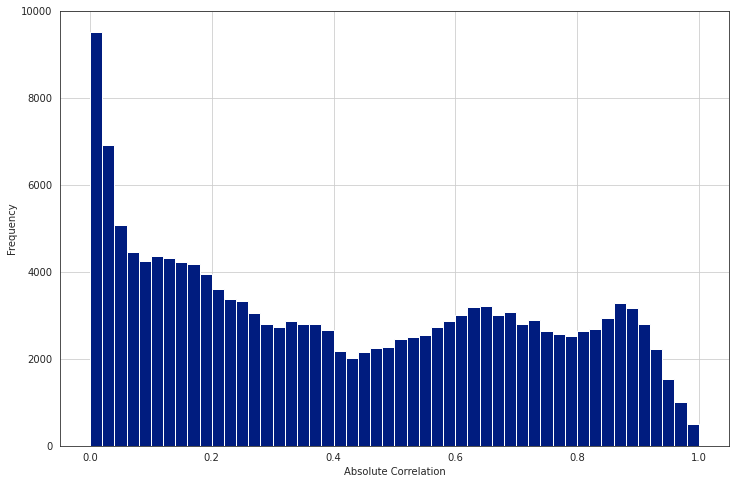

In [27]:

sns.set_style('white')
ax=corr_values.abscorrelation.hist(bins=50,figsize=(12,8))
ax.set(xlabel='Absolute Correlation',ylabel='Frequency')

So we run this and we see that most of the time there's essentially zero correlation and then we see much less at the top end that there's close to one in terms of correlation. But otherwise, maybe a couple of different modes here, but really fairly uniform across once it dips down from those lower values.

In [28]:
corr_values.sort_values('correlation',ascending=False).query('abscorrelation>0.8')

,feature1,feature2,correlation,abscorrelation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


So then we're going to say let's look at the most highly correlated values. We're going to sort the values by correlation with ascending equals false. So we're going to be going from top to bottom and then we just do .query. That's a way to filter down our database, similar to what we've done in brackets before we call .query. And then we can just pass in a column name. We only want the absolute correlation greater than 0.8. And we can look at those values and we see them all the way through the first 22,000 rows that we have for this 

In [29]:
corr_values.shape

(157080, 4)

if we look at the actual size actually let's go right here, the actual size of the original core values data frame.

This is going to be out of 157,000 different values because each one of the different cross-correlations, which is why we have so many possible values.

**Here we're going to split the data into train and test data sets. This can be done using any method. But we're going to want to consider using the SKLearn StratifiedShuffleSplit here in order to ensure that we maintain the same ratio of our predictor class, in both our train and test set. In regardless of methods used to split the data, you should afterwards compare the ratio of classes in both our train and test splits.** 

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit


We're then going to create our StratifiedShuffleSplit object, similar to how we've done with different SKLearn objects, and we're going to pass in the different arguments in regards to this specific StratifiedShuffleSplit. We only want to create one split, we're just going to split into one train and one test set. If you wanted to do more we can increase the number of splits. We want our test size to be 0.3. So 30 percent will be our holdout set. The other 70 percent is going to be what we train on. To ensure that you, as well as what I'm showing you here, will be the same results. We're using a random state here being equal to 42. Generally, doesn't matter as long as they are the same across both users

In [31]:
strat_shuf_split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

We then are going to take that StratifiedShuffleSplit that we just defined, and call this split, that split method, and then pass in both our X values, so our features, as well as our Y values, the value we're trying to predict, data.Activity.

In [33]:
strat_shuf_split.split(data[feature_cols],data.Activity)

<generator object BaseShuffleSplit.split at 0x7fdd9242ddd0>

when I run this, we see it outputs a generator object. Why call next on this object, it's just going to output, and we'll see this , both of the train and test indices. So we'll end up with train indices and tests indices with the train index being first and the tests index being second. 

In [34]:
next(strat_shuf_split.split(data[feature_cols],data.Activity))

(array([1575, 1707, 6425, ..., 3037, 3002,  996]),
 array([7743,  969, 3175, ..., 8914, 8756, 1470]))

In [36]:
train_index,test_index=next(strat_shuf_split.split(data[feature_cols],data.Activity))
x_train=data.loc[train_index,feature_cols]
y_train=data.loc[train_index,'Activity']
x_test=data.loc[test_index,feature_cols]
y_test=data.loc[test_index,'Activity']

We can then check what our value counts are for Y train, we call normalize equals true within our value counts, is they give us our proportion rather than the actual counts, and that will allow us to compare both our Y train and our Y test, and we see that they're fairly similar for each one of the difference activities, which are labeled by integers that we want to predict.

In [38]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

**We're going to fit a logistic regression model without any regularization to start, using all of our features, remember we have 561 feature, so it's quite a large feature set.**

the first thing that we do is fit a regular logistic regression model, which is just going to have no extra hyperparameters, no regularization. We see here that we pass as the solver liblinear, and the only thing you need to know, there's different solvers that optimized for different versions, and you can look at the documentation. What we need to know here is that we're using here the one versus the rest that we talked about during lecture, which is just trying to predict a certain class versus all the rest, and then another class versus all the rest. So we're going to do that six different times for each one of the six different classes, and liblinear is just one of the ways to optimize when we're using one versus rest.

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear').fit(x_train,y_train)

**Now we're going to import the LogisticRegressionCV, which is that cross-validation method we talked about in a bit in lecture, and it's similar to GridSearchCV, which we've learned about earlier, that'll allow us to loop through many different hyperparameters. What we're going to do is use that LogisticRegressionCV, the hyperparameters that we generally want to look through are the different types of penalties, we're just going to specify L1 here and the different C values, and C is similar to Lambda except that it's the inverse here. So we're going to say Cs equal 10, which is just going to be the default, and we can look at the documentation here**.

In [41]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(x_train,y_train)

So now we're back and hopefully for you that's just a cut to where we are now. I have gone ahead and fit both the logistic regression with an L1 penalty, as well as going ahead and running it for the L2 penalty, that one should be a little bit faster, as we've discussed before. Generally speaking, the L2 penalty tends to run a bit faster just because of how it works under the hood, and we have also optimized using this cross-validation method, to ensure that we are also choosing the appropriate Cs with our four different holdout sets. We have cv equal to 4 so having four different holdout sets, to see which values of C will optimize best on some holdout set.

In [42]:
lr_l2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(x_train,y_train)

So now we want to compare the magnitude of each of the coefficients for each of the models that we came up with, and we're using the one versus rest fitting, in terms of how we are using multi-label classification. What that's going to mean is that when we come up with our coefficients, if we think about the models that we're trying to create, we are trying to create models that will predict a certain class versus the rest of the classes, so standing versus not standing, sitting versus not sitting, so on and so forth

So each one of these coefficients will have to show up for each one of these one versus rest models, and they will define, for those log odds, for each coefficient, how much are we increasing the odds of standing versus not sanding, sitting versus not sitting, and so on, so that each one these coefficients will be specific to each one of our different labels

So the first thing that we're going to do is initiate an empty list. We're then going to create these coeff_labels and coeff_models, we're going to use that to loop through as we see right here, and we're going to zip those two together, and when we zip those two together, we can access both the label and the model at each step. So the lr as a string, and then the actual lr model that we created earlier, are going to be the first thing that we reach within a for loop. We're then going to pull out our coefficients. So just from our model, our mod being, again, just signifying what we have here in the for loop, we're going to pull out those coefficients. We're then going to create a multi-level index. So that multi-level index will be on top of our DataFrame, and we'll see what that looks like once I print this out, but that's going to have our different levels. So again, this is a multi-level index where the first level is going to be the name of the actual model, and then we're going to also highlight these numbers, 0, 1, 2, 3, 4, 5, which is just going to say the coefficients for each one of these versus the rest. Again, we have replaced each one of our labels with integers, and now those integers will be used to say, zero versus the rest, so that could be sitting versus the rest, standing versus the rest, and so on. Then in regards to codes, all that means is how do we want these ordered? So it's going to be 00 together, 01 together, that first one being all zeros, because we only have one label, and then that's tied to each one of these different numbers, and we'll see this with the labeling as well. We're then going to take our coefficient list and append onto that list a DataFrame of our coefficients that we have here, we're going to transpose them so that they're a column, and then the columns names are going to be that coeff_label, which is our multi-index label that we just created. Then once we run through that for loop, we are then going to concatenate each one of these different coefficient lists, we're going to concatenate the entire list together across each one of the columns

In [43]:
coefficients=list()
coeff_labels=['lr','l1','l2']
coeff_models=[lr,lr_l1,lr_l2]
for lab,mod in zip(coeff_labels, coeff_models):
        coeffs = mod.coef_
        coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                     codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
        coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))
coefficients = pd.concat(coefficients, axis=1)
coefficients.sample(10)

lr                      ...        l2                    
            0         1         2  ...         3         4         5
146  0.057569  0.736932 -0.417105  ...  0.089427  0.252544  0.049840
279  0.032997  0.637766 -0.025284  ...  0.200039 -0.236745  0.832397
177 -0.004036  0.192079  0.170310  ... -0.358683  0.075912  0.380124
239 -0.001301  0.111786 -0.765764  ... -0.614867  0.640308  0.604584
520 -0.059724 -0.119154 -0.298163  ...  0.176445  0.230047  0.047554
240  0.007842  0.180655 -0.102638  ... -0.552470  0.244328 -0.603825
480  0.001270  0.223911  0.193147  ... -0.246494  0.343190  0.331258
1    0.014493 -0.201047  0.060892  ... -0.153928  0.185910 -0.524950
32  -0.057191  0.884949 -0.855280  ...  0.121518  0.124885 -1.267163
387 -0.003746  0.209669  0.250573  ...  0.307672  0.513075  0.330396

[10 rows x 18 columns]

In [45]:
coefficients.shape

(561, 18)

Now we're going to plot all of these models, and again, the code is a bit complex, so we're going to walk through step-by-step so that we understand what we're actually doing here. We're going to create our subplots using plt.subplots, we're going to initiate the figure, and then also this axList. That axList should be three rows by two columns, so there should be six different bounding boxes within which we can plot. We're then going to flatten that out, just so it's easier to run a for-loop through that axList. So we're going to end up with the first one, the second one, the third one, each one of those being a bounding box. So we'll have six bounding boxes, and then we just set the size here using that figure objects to make sure that we have the size that we want for each one of these, for the entire figure. We're then going to enumerate the axList. Now the axList currently is an object that is going to be the six bounding boxes in which all of our different plots are going to be contained. Our loc, because we're enumerating axList, that axList is going to come with a numerical value, that's going to be the loc. So it will be 0, 1, 2, 3, 4, 5, 6, with the related ax, with that related bounding box. We're then going to take the coefficients, which is what we had up here. This is just a sample of it, but it's going to be that 561 row by 18 column data frame, and we're going to access certain values. You see here we have that multiple index where we have linear regression as at top index, or logistic regression, excuse me, and then the l1 penalty and the l2 penalty. Then below that, we have each one of the different models, one versus the rest. We're going to say that we want to locate. Here we're using the loc value that we used for enumerate. So the first value, that's going to be zero. So we're going to be locating each one of these different zeros. So we have a zero here, and a zero here for l1, and a zero here for l2. We're accessing that in level one. So lr, l1, and l2 are level zero. We're accessing within level one, and we're saying that the axis is equal to 1. So we can have multiple indices for our rows, but we have multiple indices for our columns. So axis equals 1's means that we're using axis to access our multilevel column index. We're then going to take that data, which is now specific to at first just these zeros, so lr zero, l1 zero, and l2 zero, and we're going to plot those just using a scatter plot. So we're going to have a marker equal to o, no lines between. We're setting our marker, so each one of those dots will be a size of two. Where do we want to plot that? In this axis that we've defined here, in the bounding box as we loop through them, and we don't want a legend. Then we're saying here, if the axis, axList 0, if it is our first value, then we will actually add on this legend at the location equal to 4. Then we just set our title plus that string, and we'll run this. What we see here is for the coefficient set 0, so this is zero versus the rest. We have each one of our different coefficients, and there should be 561 of them. We see that we have some high values here on the low end, and maybe some here on the low end for coefficient set 0. For coefficient set 3, we see it's scattered throughout. So here's just getting the strength of each one of those coefficients.

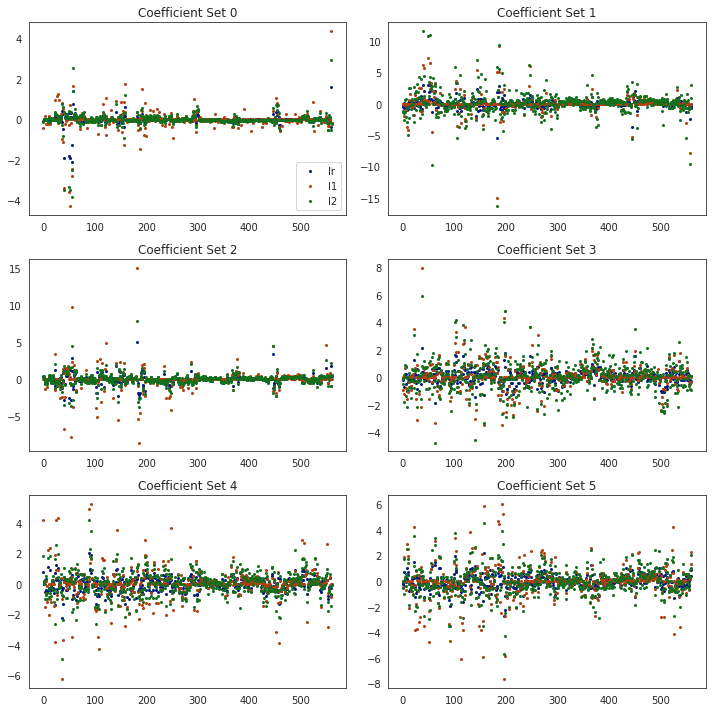

In [46]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)
for loc, ax in enumerate(axList):
       data = coefficients.xs(loc, level=1, axis=1)
       data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
       if ax is axList[0]:
            ax.legend(loc=4),
       ax.set(title='Coefficient Set '+str(loc))
plt.tight_layout()

**we will actually start to predict each one of our different labels, as well as start storing the probabilities. And that's because as we spoke about during lecture, one, we want to do certain scoring such as the ROC curve. We're going to need the probabilities. Whereas when we're trying to do the accuracy or the precision or the recall only the actual predicted labels. So we're going to start off with creating an empty list, which is just going to be our different predictions for each one of our different models. And then our list of probabilities, which is just going to be the probabilities for each one of our different classes for each one of our different models. So for each model, there'll be six different probabilities**

In [51]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]
for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(x_test), name=lab))
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                     codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    y_prob.append(pd.DataFrame(mod.predict_proba(x_test),columns=coeff_label))
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)
y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [52]:
y_prob.head()

lr                ...            l2              
          0             1  ...             4             5
0  0.000034  1.683463e-04  ...  3.877097e-09  6.047864e-07
1  0.000037  3.211940e-07  ...  5.102614e-04  9.994893e-01
2  0.000036  4.352850e-03  ...  2.477182e-04  2.598493e-05
3  0.000223  9.813814e-01  ...  2.128807e-09  2.039895e-21
4  0.998277  1.717719e-03  ...  1.727790e-09  7.562326e-19

[5 rows x 18 columns]

In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
metrics = list()
cm = dict()
for lab in coeff_labels:
    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    # The usual way to calculate accuracy\n",
    accuracy = accuracy_score(y_test, y_pred[lab])
    # ROC-AUC scores can be calculated by binarizing the data\n",
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),average='weighted'),
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                                  'fscore':fscore, 'accuracy':accuracy,
                                  'auc':auc},
                                 name=lab))
metrics = pd.concat(metrics, axis=1)

In [54]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,"(0.9903839811943528,)","(0.9901435760276165,)","(0.9901650419157019,)"


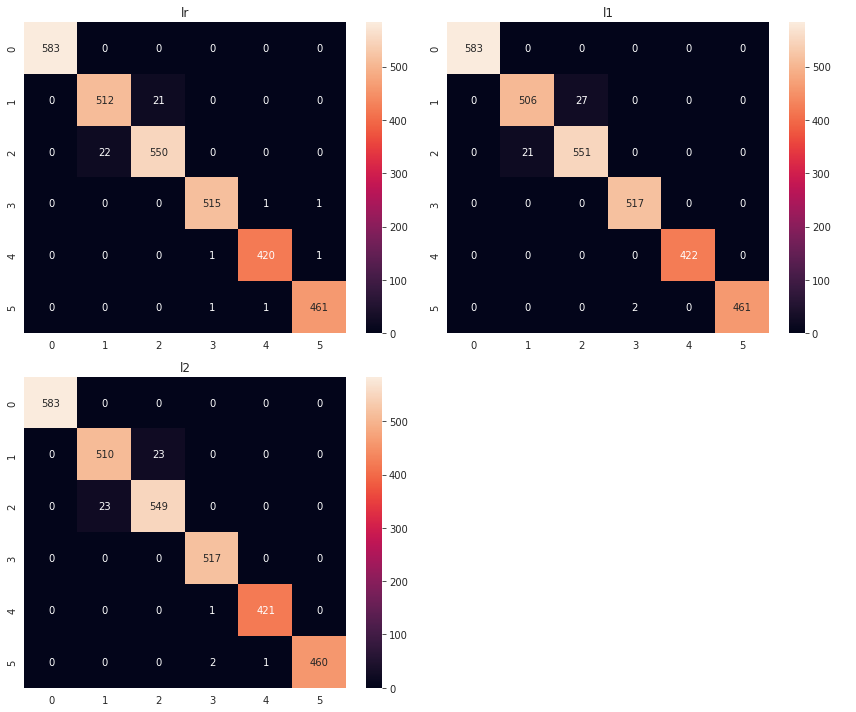

In [59]:
#Display or plot the confusion matrix for each model.
import seaborn as sns
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')
for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
plt.tight_layout()